In [ ]:
import numpy as np    
from sklearn.utils import shuffle

# generation of 100 3D points according to the centered normal law
# each group is translated by a vector [3,3,3]
d1 = np.random.randn(100,3) + [3,3,3]
d2 = np.random.randn(100,3) + [-3,-3,-3]
d3 = np.random.randn(100,3) + [-3,3,3]
d4 = np.random.randn(100,3) + [-3,-3,3]
d5 = np.random.randn(100,3) + [3,3,-3]

# generation of labels for each group
c1 = np.ones(100)
c2 = 2 * np.ones(100)
c3 = 3 * np.ones(100)
c4 = 4 * np.ones(100)
c5 = 5 * np.ones(100)

# concatenation of data in a matrix
data = np.concatenate((d1,d2,d3,d4,d5))
labels = np.concatenate((c1, c2, c3, c4, c5))
print(data.shape)
# random permutation of the rows of the data matrix
data, labels = shuffle(data, labels)

(500, 3)


Visualize the starting groups:

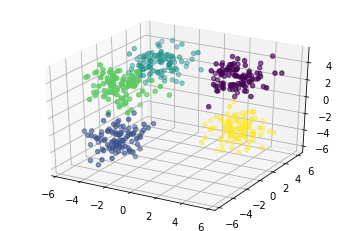

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# The color of the points depends on their label
ax.scatter(data[:,0], data[:,1], data[:,2], c=labels)
plt.show()

Apply automatic classification with K-means, first with a single trial (a single initialization followed by a single execution of *K-means*, n_init=1) using the k-means++ initialization method:

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(data)

Review the parameters, attributes, and methods of the sklearn.cluster.KMeans class by following the link given above. The predicted groups for the data can be obtained using the predict(X) method:

In [ ]:
pred = kmeans.predict(data)

Groups associated with training examples are also stored in the kmeans.labels_ attribute:

In [ ]:
print(kmeans.labels_)

[0 1 1 3 0 0 3 2 4 2 4 3 0 1 2 1 0 2 1 0 4 3 2 3 4 0 1 4 2 2 1 4 4 0 2 4 0
 2 2 2 3 0 3 0 2 2 3 0 0 0 3 3 4 2 2 2 3 2 4 3 2 0 4 2 4 2 2 1 4 1 2 4 4 3
 2 1 3 3 3 0 0 3 0 1 1 1 0 4 0 3 1 4 3 2 1 1 0 4 0 3 4 1 4 2 4 3 3 3 1 3 4
 0 2 3 2 3 2 4 0 0 0 2 2 2 1 1 3 1 1 2 1 4 0 0 4 0 2 2 4 2 0 0 1 3 3 1 4 3
 3 2 3 1 4 2 2 4 1 3 1 3 2 1 3 1 0 3 1 3 3 3 2 1 0 2 4 4 2 0 1 2 3 0 4 3 0
 2 4 4 3 1 4 1 3 2 0 0 0 1 2 1 4 3 2 2 3 0 1 4 3 1 3 2 4 1 0 0 3 1 2 3 4 1
 4 1 0 0 2 1 1 1 3 2 1 0 4 4 3 0 1 3 0 2 3 3 2 2 0 1 4 4 2 1 4 4 4 4 0 4 4
 3 1 1 2 4 1 1 1 4 0 3 2 0 2 1 2 4 3 4 2 1 1 2 2 4 1 0 1 4 0 3 4 1 3 2 1 1
 3 3 4 2 2 3 3 4 4 2 0 3 2 4 1 1 0 3 3 4 0 4 0 2 1 4 2 3 4 2 1 3 0 2 1 3 0
 0 0 1 0 0 4 3 4 3 4 1 0 1 0 1 0 4 3 0 4 3 4 2 0 3 0 2 4 1 4 4 3 3 0 0 1 0
 3 2 0 1 4 2 3 0 4 0 0 4 0 0 3 4 4 2 0 4 3 1 1 4 3 3 3 3 3 4 0 2 4 2 3 4 1
 0 0 2 1 1 1 2 2 3 2 4 4 2 2 0 3 1 3 1 1 1 4 3 3 1 0 3 1 4 1 3 1 2 0 3 3 1
 0 4 0 4 4 1 1 0 3 0 2 0 2 1 4 2 2 1 0 2 0 1 2 3 1 1 4 2 2 4 0 2 0 2 4 4 2
 1 0 1 0 2 0 3 0 4 2 4 0 

Visualize the results of this classification:

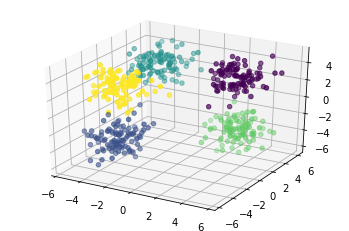

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=pred)
plt.show()

It is possible to assess the consistency between the starting groups and the partitioning found by K-means using the adjusted Rand index:

Text(0, 0.5, 'score')

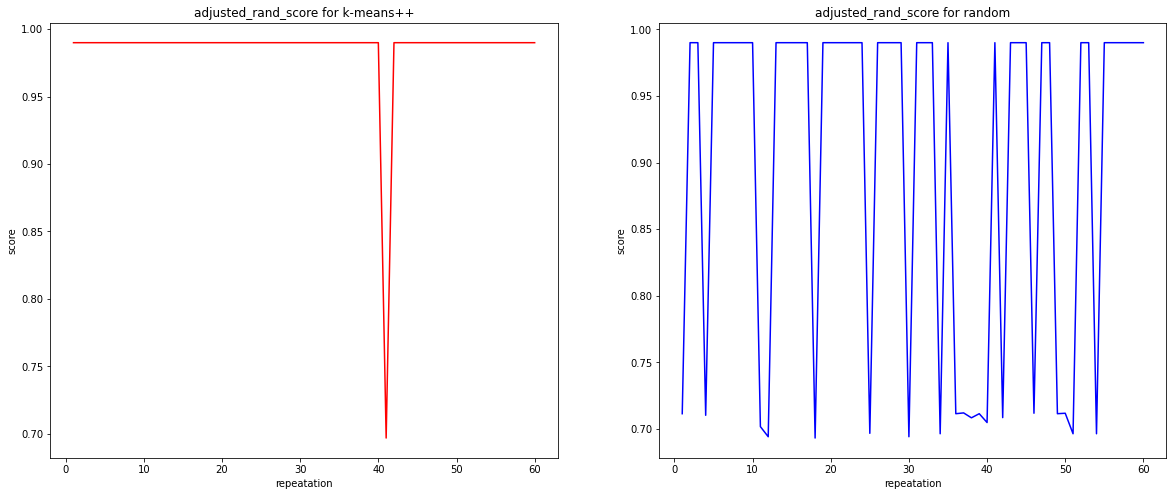

In [ ]:
k=[metrics.adjusted_rand_score(KMeans(n_clusters=5, n_init=1, init='k-means++')
               .fit(data).labels_, labels) for i in range(1,61)]
               
r=[metrics.adjusted_rand_score(KMeans(n_clusters=5, n_init=1, init='random')
              .fit(data).labels_, labels) for i in range(1,61)]
fig = plt.figure(figsize=(20, 8))
fig.add_subplot(121)
plt.plot(range(1,61), k,c='red')
plt.title("adjusted_rand_score for k-means++")
plt.xlabel("repeatation")
plt.ylabel("score")
fig.add_subplot(122)
plt.plot(range(1,61), r,c='b')
plt.title("adjusted_rand_score for random")
plt.xlabel("repeatation")
plt.ylabel("score")

bold text
 **As ca be seen in two method "kmeans++" and "random" by each initialization methods adjusted_rand_score has changed. But consistency of "kmeans++" is more than "random" and kmeans++ has more stable score.**

**Varing the number of clusters (n_clusters)** 



Text(0, 0.5, 'score')

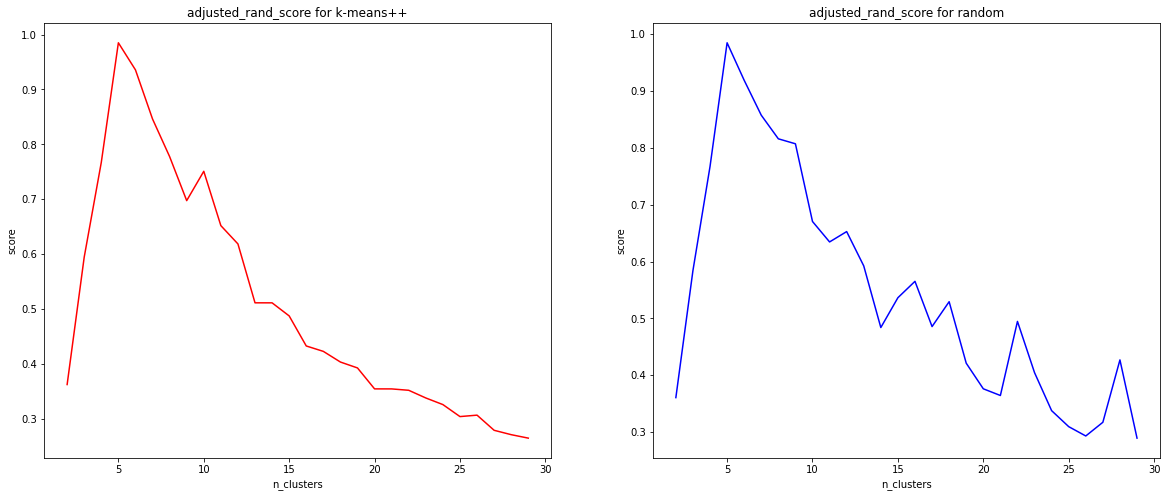

In [ ]:
k=[metrics.adjusted_rand_score(KMeans(n_clusters=n, n_init=1, init='k-means++')
.fit(data).labels_, labels) for n in range(2,30)]
r=[metrics.adjusted_rand_score(KMeans(n_clusters=n, n_init=1, init='random')
.fit(data).labels_, labels) for n in range(2,30)]
fig = plt.figure(figsize=(20, 8))
fig.add_subplot(121)
plt.plot(range(2,30), k,c='red')
plt.title("adjusted_rand_score for k-means++")
plt.xlabel("n_clusters")
plt.ylabel("score")
fig.add_subplot(122)
plt.plot(range(2,30), r,c='b')
plt.title("adjusted_rand_score for random")
plt.xlabel("n_clusters")
plt.ylabel("score")



**by changing the number of cluster in both algorithm kmeans++ and random adjusted_rand_score has decresed. so the the optimal n_cluster is 5 and with n_cluster=5 the obtain the highest score**

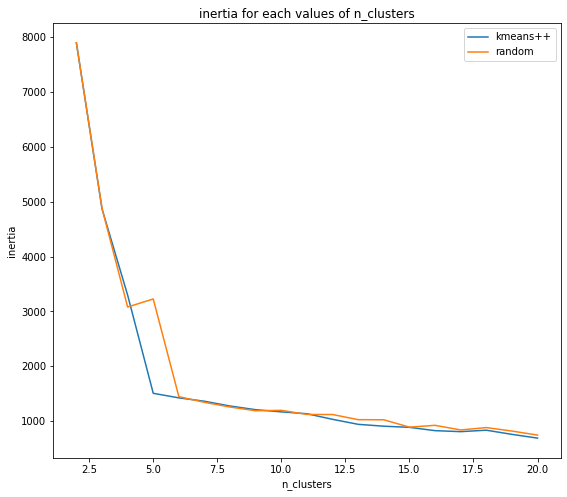

In [ ]:
kI=[KMeans(n_clusters=n, n_init=1, init='k-means++').fit(data).inertia_ 
   for n in range(2,21)]
rI=[KMeans(n_clusters=n, n_init=1, init='random').fit(data).inertia_ 
   for n in range(2,21)]
fig = plt.figure(figsize=(20, 8))
fig.add_subplot(122)
plt.plot(range(2,21),kI,label='kmeans++')
plt.plot(range(2,21),rI,label='random')
plt.title("inertia for each values of n_clusters")
plt.xlabel("n_clusters")
plt.ylabel("inertia")
plt.legend()

**by incresing the number of cluster in both random and kmeans++ algorithm inertia cost has decrease.**

In [ ]:
u=r=np.random.uniform(0,1,(500,3))

In [ ]:
kmeans = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(u)
pred = kmeans.predict(u)
KMeans1=KMeans(n_clusters=5,random_state=1234, n_init=1, init='random').fit(u)
metrics.adjusted_rand_score(KMeans1.labels_, pred)


0.5771930630594468

In [ ]:
kmeans2=KMeans(n_clusters=5,random_state=1234,n_init=1, init='k-means++').fit(u)
metrics.adjusted_rand_score(kmeans2.labels_, pred)

0.6773623991911719

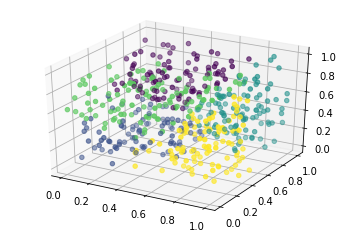

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(u[:,0], u[:,1], u[:,2], c=KMeans1.labels_)
plt.show()

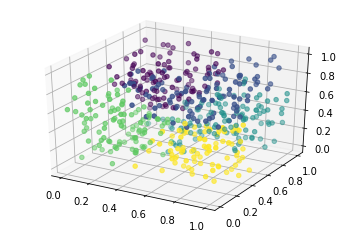

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(u[:,0], u[:,1], u[:,2], c=kmeans2.labels_)
plt.show()

Text(0, 0.5, 'score')

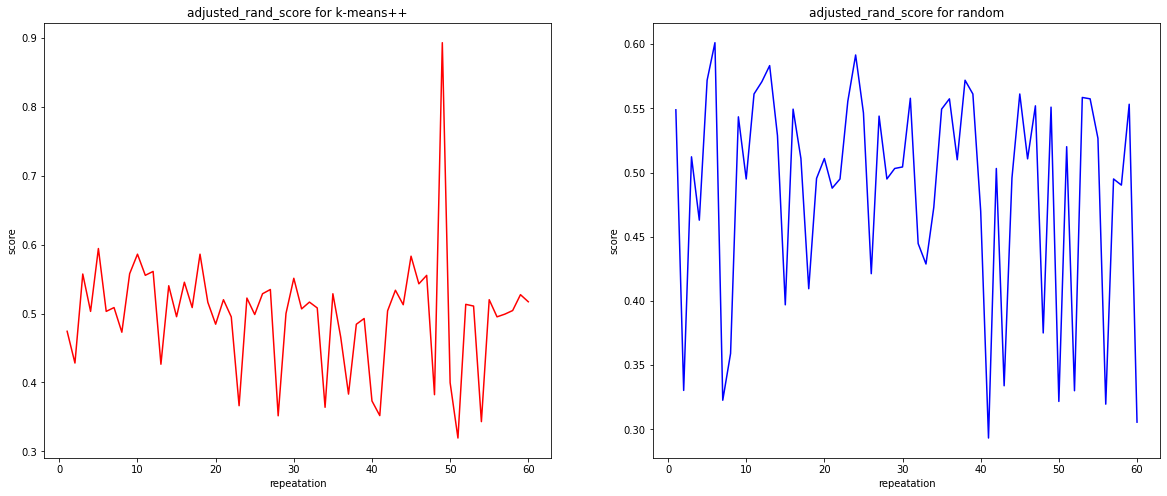

In [ ]:
kmeans = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(u)
pred = kmeans.predict(u)

r=[metrics.adjusted_rand_score(KMeans(n_clusters=5, n_init=1, init='random')
              .fit(u).labels_, pred) for i in range(1,61)]
k=[metrics.adjusted_rand_score(KMeans(n_clusters=5, n_init=1, init='k-means++')
               .fit(u).labels_, pred) for i in range(1,61)]
               

fig = plt.figure(figsize=(20, 8))
fig.add_subplot(121)
plt.plot(range(1,61), k,c='red')
plt.title("adjusted_rand_score for k-means++")
plt.xlabel("repeatation")
plt.ylabel("score")
fig.add_subplot(122)
plt.plot(range(1,61), r,c='b')
plt.title("adjusted_rand_score for random")
plt.xlabel("repeatation")
plt.ylabel("score")

**the score is really less than the score of data generated at the beginning of this section and stability is very lower than the beginig so changing and flactuation of score is very much.**

**LDA**

In [ ]:
textures = np.loadtxt('texture.dat')
np.random.shuffle(textures)
kmeans = KMeans(n_clusters=11).fit(textures[:,:40])
metrics.adjusted_rand_score(kmeans.labels_, textures[:,40])

0.4633295976331011

In [ ]:
#with 3 dimention
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 3)
X_lda = lda.fit_transform(textures[:,:40],textures[:,40])
kmeans2 = KMeans(n_clusters=11).fit(X_lda)
metrics.adjusted_rand_score(kmeans2.labels_, textures[:,40])

0.7564551500774443

In [ ]:
len(textures[:,40])

5500

In [ ]:
X_lda.shape

(5500, 3)

In [ ]:
len(KMeans1.labels_)

500

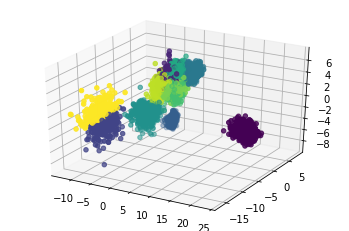

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_lda[:,0], X_lda[:,1], X_lda[:,2], c=kmeans2.labels_)
plt.show()

Text(0, 0.5, 'score')

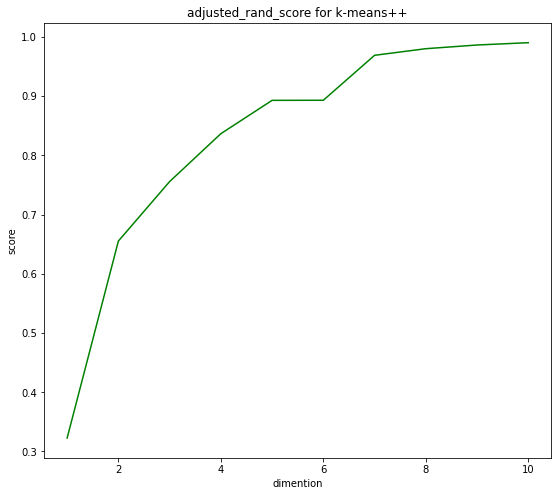

In [ ]:
lda=[metrics.adjusted_rand_score(KMeans(n_clusters=11)
              .fit(LinearDiscriminantAnalysis(n_components = i).
                   fit_transform(textures[:,:40],textures[:,40])).labels_, textures[:,40]) for i in range(1,11)]
fig = plt.figure(figsize=(20, 8))
fig.add_subplot(121)
plt.plot(range(1,11), lda,c='g')
plt.title("adjusted_rand_score for k-means++")
plt.xlabel("dimention")
plt.ylabel("score")

**by increasing dimention score has increased**